In [2]:
from shapely.geometry import Point, Polygon

In [3]:
import fiona

In [29]:
shape = fiona.open("/home/taehyun/workspace/data/dong/Z_SOP_BND_ADM_DONG_PG.shp")

In [5]:
from pyproj import Proj, transform

In [ ]:
#좌표계 맞추기

In [6]:
proj_UTMK = Proj(init = 'epsg:5178')
proj_WGS84 = Proj(init = 'epsg:4166')
proj_GRS80 = Proj(init = 'epsg:5181')

/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred i

In [ ]:
def transform_utmk_to_w84(df):
    return pd.Series(transform(proj_UTMK, proj_WGS84, df['x_axis'],df['y_axis']), index = ['x_axis','y_axis'])

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('./bus_coord.csv')

In [9]:
df

,정류소id,정류소명,경도,위도,sigungu_name,dong_name,x,y
0,1001,종로2가사거리,126.987786,37.569764,종로구,교남동,198920.994912,452247.155734
1,1002,창경궁.서울대학교병원,126.996520,37.579179,종로구,종로1·2·3·4가동,199692.622342,453292.015280
2,1003,명륜3가.성대입구,126.998290,37.582709,종로구,종로1·2·3·4가동,199848.977094,453683.796146
3,1004,종로2가.삼일교,126.987507,37.568582,종로구,교남동,198896.329744,452115.979635
4,1005,혜화동로터리.여운형활동터,127.001694,37.586230,종로구,Samseon-dong,200149.646776,454074.604840
...,...,...,...,...,...,...,...,...
45501,233002602,흥법리마을회관,126.734033,37.164950,화성시,향남읍,176377.073977,407352.095714
45502,233002916,흥법리모래지,126.740150,37.166583,화성시,향남읍,176920.851507,407531.855079
45503,233002603,흥법리모래지,126.739967,37.166583,화성시,향남읍,176904.571285,407531.899701
45504,233000574,흥법사입구,126.980350,37.200050,화성시,봉담읍,198255.513557,411214.589159


In [22]:
from tqdm import tqdm

In [ ]:
fail = 0
dong_code = []
for j in tqdm(range(3493)):
    try:
        coords = shape.next()['geometry']['coordinates'][0]
        poly = Polygon(coords)
        for i in range(len(df)):
            p1 = Point(list(df['x'])[i],list(df['y'])[i])
            if p1.within(poly):
                dong_code.append(shape.next()['properties']['ADM_DR_CD'])
    except:
        dong_code.append('fail')
        fail += 1

  0%|          | 0/3493 [00:00<?, ?it/s]/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/ipykernel_launcher.py:5: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """
  1%|          | 29/3493 [06:50<21:03,  2.74it/s]    

In [10]:
shape.next()['properties']['ADM_DR_CD']

/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/ipykernel_launcher.py:1: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """Entry point for launching an IPython kernel.


'1101053'

In [14]:
df

,정류소id,정류소명,경도,위도,sigungu_name,dong_name,x,y
0,1001,종로2가사거리,126.987786,37.569764,종로구,교남동,198920.994912,452247.155734
1,1002,창경궁.서울대학교병원,126.996520,37.579179,종로구,종로1·2·3·4가동,199692.622342,453292.015280
2,1003,명륜3가.성대입구,126.998290,37.582709,종로구,종로1·2·3·4가동,199848.977094,453683.796146
3,1004,종로2가.삼일교,126.987507,37.568582,종로구,교남동,198896.329744,452115.979635
4,1005,혜화동로터리.여운형활동터,127.001694,37.586230,종로구,Samseon-dong,200149.646776,454074.604840
...,...,...,...,...,...,...,...,...
45501,233002602,흥법리마을회관,126.734033,37.164950,화성시,향남읍,176377.073977,407352.095714
45502,233002916,흥법리모래지,126.740150,37.166583,화성시,향남읍,176920.851507,407531.855079
45503,233002603,흥법리모래지,126.739967,37.166583,화성시,향남읍,176904.571285,407531.899701
45504,233000574,흥법사입구,126.980350,37.200050,화성시,봉담읍,198255.513557,411214.589159


In [11]:
dong_cd = pd.read_csv('/home/taehyun/workspace/data/행정동_법정동.csv')

In [13]:
dong_cd[dong_cd['시도'].str.contains('경기')]

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭
2782,경기도,경기도,경기도,경기도,경기도,31.0,4100000000,19880423,4100000000,NaN,Gyeonggi-do
2783,경기도,경기도,북부출장소,북부출장소,경기도,NaN,4110500000,19880423,4110500000,NaN,-
2784,경기도,수원시,수원시,수원시,수원시,31010.0,4111000000,19880423,4111000000,NaN,Suwon-si
2785,경기도,수원시 장안구,수원시 장안구,수원시 장안구,수원시 장안구,31011.0,4111100000,19880701,4111100000,NaN,Jangan-gu
2786,경기도,수원시 장안구,파장동,파장동,파장동,3101154.0,4111156000,20031124,4111112900,NaN,Pajang-dong
...,...,...,...,...,...,...,...,...,...,...,...
5203,경기도,양평군,개군면,개군면,내리,3138041.0,4183041000,19880423,4183041029,NaN,Gaegun-myeon
5204,경기도,양평군,개군면,개군면,향리,3138041.0,4183041000,19880423,4183041030,NaN,Gaegun-myeon
5205,경기도,양평군,개군면,개군면,주읍리,3138041.0,4183041000,19880423,4183041031,NaN,Gaegun-myeon
5206,경기도,양평군,개군면,개군면,계전리,3138041.0,4183041000,19880423,4183041032,NaN,Gaegun-myeon


In [41]:
shape = fiona.open("/home/taehyun/workspace/data/dong/Z_SOP_BND_ADM_DONG_PG.shp")

In [42]:
dong_code = []
coord = []
for i in range(3943):
    A = shape.next()
    if A['properties']['ADM_DR_CD'][:2] == '11' or A['properties']['ADM_DR_CD'][:2] == '31':
        dong_code.append(A['properties']['ADM_DR_CD'])
        coord.append(A['geometry']['coordinates'][0])

/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/ipykernel_launcher.py:4: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  after removing the cwd from sys.path.


StopIteration: 

In [46]:
dong_code

['1101053',
 '1101054',
 '1101055',
 '1101056',
 '1101057',
 '1101058',
 '1101060',
 '1101061',
 '1101063']

In [19]:
len(coord)

972

In [23]:
fail = 0
dong_code = []
for j in tqdm(range(972)):
    try:
        coords = coord[j]
        poly = Polygon(coords)
        for i in range(len(df)):
            p1 = Point(list(df['x'])[i],list(df['y'])[i])
            if p1.within(poly):
                dong_code.append(shape.next()['properties']['ADM_DR_CD'])
    except:
        dong_code.append('fail')
        fail += 1

  0%|          | 0/972 [00:00<?, ?it/s]/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/ipykernel_launcher.py:10: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 972/972 [16:56:37<00:00, 62.76s/it]   


In [28]:
df

,정류소id,정류소명,경도,위도,sigungu_name,dong_name,x,y
0,1001,종로2가사거리,126.987786,37.569764,종로구,교남동,198920.994912,452247.155734
1,1002,창경궁.서울대학교병원,126.996520,37.579179,종로구,종로1·2·3·4가동,199692.622342,453292.015280
2,1003,명륜3가.성대입구,126.998290,37.582709,종로구,종로1·2·3·4가동,199848.977094,453683.796146
3,1004,종로2가.삼일교,126.987507,37.568582,종로구,교남동,198896.329744,452115.979635
4,1005,혜화동로터리.여운형활동터,127.001694,37.586230,종로구,Samseon-dong,200149.646776,454074.604840
...,...,...,...,...,...,...,...,...
45501,233002602,흥법리마을회관,126.734033,37.164950,화성시,향남읍,176377.073977,407352.095714
45502,233002916,흥법리모래지,126.740150,37.166583,화성시,향남읍,176920.851507,407531.855079
45503,233002603,흥법리모래지,126.739967,37.166583,화성시,향남읍,176904.571285,407531.899701
45504,233000574,흥법사입구,126.980350,37.200050,화성시,봉담읍,198255.513557,411214.589159


In [39]:
df2 = df[(df['x']>198000)&(df['x']<199000)&(df['y']>453000)&(df['y']<455000)]

In [40]:
df2

,정류소id,정류소명,경도,위도,sigungu_name,dong_name,x,y
90,1172,창덕궁.서울돈화문국악당,126.988600,37.577421,종로구,교남동,198993.026979,453097.003927
97,1199,창덕궁.우리소리박물관,126.987876,37.577291,종로구,교남동,198929.035915,453082.545697
157,1501,삼청공원,126.981683,37.588205,종로구,삼청동,198382.227110,454293.990508
165,1509,금융연수원,126.981632,37.586597,종로구,삼청동,198377.661327,454115.520477
174,1518,삼청동주민센터,126.981921,37.584262,종로구,삼청동,198403.189857,453856.360352
181,1525,통일부,126.985644,37.587574,종로구,종로1·2·3·4가동,198732.083669,454223.845849
182,1526,원서고개,126.987808,37.583139,종로구,가회동,198923.095759,453731.641917
184,1529,삼청파출소,126.981253,37.581813,종로구,삼청동,198344.072021,453584.528653
191,1536,감사원,126.985353,37.586300,종로구,종로1·2·3·4가동,198706.298079,454082.499088
192,1537,중앙중고,126.986965,37.583130,종로구,가회동,198848.618029,453730.636372


In [43]:
shape = fiona.open("/home/taehyun/workspace/data/dong/Z_SOP_BND_ADM_DONG_PG.shp")

In [44]:
fail = 0
dong_code = []
try:
    coords = coord[1]
    poly = Polygon(coords)
    for i in range(len(df2)):
        p1 = Point(list(df2['x'])[i],list(df2['y'])[i])
        if p1.within(poly):
            dong_code.append(shape.next()['properties']['ADM_DR_CD'])
except:
    dong_code.append('fail')
    fail += 1

/home/taehyun/anaconda3/envs/TH/lib/python3.6/site-packages/ipykernel_launcher.py:9: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  if __name__ == '__main__':


In [45]:
dong_code

['1101053',
 '1101054',
 '1101055',
 '1101056',
 '1101057',
 '1101058',
 '1101060',
 '1101061',
 '1101063']

In [31]:
poly = Polygon(coord[0])

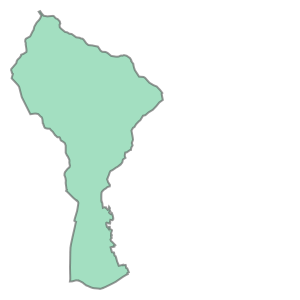

In [32]:
poly

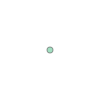

In [34]:
p1 = Point(list(df['x'])[0],list(df['y'])[0])
p1

In [35]:
p1.within(poly)

False

In [36]:
poly,p1

(<shapely.geometry.polygon.Polygon at 0x7f86de13bd30>,
 <shapely.geometry.point.Point at 0x7f86de1322e8>)